In [1]:
from __future__ import division,print_function

import ephem
import os
import sys
import healpy as hp
import matplotlib as mpl             ### For plotting options
import matplotlib.pyplot as plt
import numpy as np
import time
import h5py 
import copy
DUST_3D_TEMPERATURE_MAP_DATA_LOCATION = os.environ["DUST_3D_TEMPERATURE_MAP_DATA_LOCATION"]
DUST_3D_TEMPERATURE_MAP_CODE_LOCATION = os.environ["DUST_3D_TEMPERATURE_MAP_CODE_LOCATION"]
DUST_3D_TEMPERATURE_MAP_PAPER_LOCATION = os.environ["DUST_3D_TEMPERATURE_MAP_PAPER_LOCATION"]
DUST_3D_TEMPERATURE_MAP_PLOTS_LOCATION = os.environ["DUST_3D_TEMPERATURE_MAP_PLOTS_LOCATION"]
sys.path.insert(0, DUST_3D_TEMPERATURE_MAP_CODE_LOCATION)

import utils
import sky_analysis
import sky_plots

In [2]:
#### These maps are nested

theta,phi = hp.pixelfunc.pix2ang(nside=32,ipix=5908,nest=True,lonlat=True)

In [3]:
hp.pixelfunc.ang2pix(nside=64,theta=theta, phi=phi,nest=True,lonlat=True)

23633

In [4]:
theta

98.4375

In [5]:
phi

8.385538647081319

In [6]:
color_dict  =utils.colorblind_color_dict_15()

In [7]:
file = "/home/izelko/Documents/dust_data/data/3D_dust_temperature/sampler/tiny_cepheus_beta_fixed_nside32/5908/5908_sampler_run.hdf5"

data_dict = {}
with h5py.File(file, "r") as g:
    for key in list(g.keys()):
        data_dict[key]=g[key][()]
    g.close()

In [8]:
T0 = data_dict['chain_unscaled_values'][:,1500:,2].flatten()
T1 = data_dict['chain_unscaled_values'][:,1500:,3].flatten()

Text(0.5, 1.0, 'Cepheus Cloud Line of Sight Temperature')

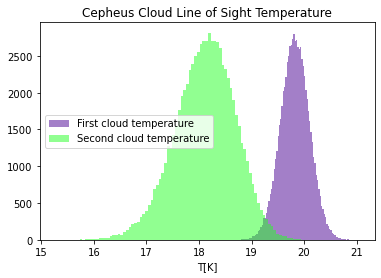

In [9]:
fig,ax = plt.subplots(figsize=(6,4))
ax.hist(T0,bins=100,alpha=0.5,label="First cloud temperature", color=color_dict["cb_purple"])
ax.hist(T1,bins=100,alpha=0.5,label="Second cloud temperature", color=color_dict["cb_bright_green"])
ax.legend(loc="center left")
ax.set_xlabel("T[K]")
ax.set_title(r"Cepheus Cloud Line of Sight Temperature")
# plt.savefig("/home/izelko/Documents/dust_data/plots/3D_dust_temperature_map_plots/sampler/tiny_cepheus_beta_fixed_nside32/5908/two_temps.jpg")
# plt.savefig("/home/izelko/Documents/dust_data/plots/3D_dust_temperature_map_plots/sampler/tiny_cepheus_beta_fixed_nside32/5908/two_temps.pdf",dpi=400)
# plt.savefig("/home/izelko/Dropbox/research/research_projects/3D_dust_temperature_map/presentation/two_temps.jpg", dpi=1000)
# plt.savefig("/home/izelko/Dropbox/research/research_projects/3D_dust_temperature_map/presentation/two_temps.pdf", dpi=1000)

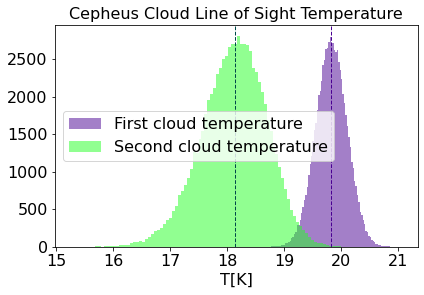

In [16]:

fontsize=16
# Calculate statistics
mean_T0 = np.mean(T0)
std_T0 = np.std(T0)
median_T0 = np.median(T0)

mean_T1 = np.mean(T1)
std_T1 = np.std(T1)
median_T1 = np.median(T1)

# Your existing plot code...
fig, ax = plt.subplots(figsize=(6,4.2))
ax.hist(T0, bins=100, alpha=0.5, label="First cloud temperature", color=color_dict["cb_purple"])
ax.hist(T1, bins=100, alpha=0.5, label="Second cloud temperature", color=color_dict["cb_bright_green"])

# Add vertical lines for the medians
ax.axvline(median_T0, color=color_dict["cb_purple"], linestyle='dashed', linewidth=1)
ax.axvline(median_T1, color=color_dict["cb_dark_green"], linestyle='dashed', linewidth=1)

ax.legend(loc="center left",fontsize=fontsize)
ax.set_xlabel("T[K]",fontsize=fontsize)
ax.set_title(r"Cepheus Cloud Line of Sight Temperature",fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tight_layout()
# Save the figure
plt.savefig("/home/izelko/Dropbox/Apps/Overleaf/3D Nature/two_temps.pdf")
plt.savefig("/home/izelko/Documents/dust_data/plots/3D_dust_temperature_map_plots/sampler/tiny_cepheus_beta_fixed_nside32/5908/two_temps.jpg")
plt.savefig("/home/izelko/Documents/dust_data/plots/3D_dust_temperature_map_plots/sampler/tiny_cepheus_beta_fixed_nside32/5908/two_temps.pdf", dpi=400)
plt.savefig("/home/izelko/Dropbox/research/research_projects/3D_dust_temperature_map/presentation/two_temps.jpg", dpi=1000)
plt.savefig("/home/izelko/Dropbox/research/research_projects/3D_dust_temperature_map/presentation/two_temps.pdf", dpi=1000)


In [11]:
median_T0

19.827530886309624

In [18]:
mean_T0

19.827868418288695

In [ ]:
run_list=["tiny_cepheus_beta_fixed_nside32" ] 
#run_list = ["tiny_cepheus_beta_varying_nside64"]
#run_list = ["tiny_cepheus_beta_varying_nside32"]

#run_list = ["lower_right_tiny_cepheus_beta_fixed_nside128"]
#run_list = ["lower_right_tiny_cepheus_beta_fixed_nside64"]
#run_list = ["lower_right_tiny_cepheus_beta_fixed_nside32"]

#run_list = ["tiny_cepheus_beta_varying_nside32"]
for run in run_list:
    print("Doing run ", run)
    # p = SkyAnalysis(run,run_type="optimizer") 
    # p.set_up_analysis()
    # p.load_data()
    p = sky_analysis.SkyAnalysis(run,run_type="sampler") 
    p.set_up_analysis()
    p.load_data()
    #p.run_optimizer()
    p.run_sampler()
    time_string = utils.end_time(start_time)    


In [ ]:
def run_sampler(self):
    #Selecting the super pixels for the fit
    self.sampler_options()
    print("running the sampler now")
    optimizer_data_dict = self.load_optimizer_sky_data()
    optimizer_parameters = optimizer_data_dict["final_parameters_array"]
    optimizer_chi_square = optimizer_data_dict["final_chi_square_array"]
    start_pixel  =self.start_super_pixel
    end_pixel = self.end_super_pixel 

    super_pixels_index_array = np.array(range(start_pixel,end_pixel))
    n_chosen_super_pix = len(super_pixels_index_array) #Number of superpixels

    nr_of_parallel_processes = self.nr_of_parallel_processes
    if n_chosen_super_pix%nr_of_parallel_processes !=0:
        raise ValueError("Wrong nr of parralel processes or super pixels!!!")
    part_n_super_pixels = int(n_chosen_super_pix/nr_of_parallel_processes)



    start_time = time.time()

    processes = []
    for process_index in range(nr_of_parallel_processes):
        def do_it():
            sys.stdout.flush()
            part_super_pixels_index_array = super_pixels_index_array[process_index*part_n_super_pixels:(process_index+1)*part_n_super_pixels]
            part_optimizer_parameters = optimizer_parameters[process_index*part_n_super_pixels:(process_index+1)*part_n_super_pixels]
            part_optimizer_chi_square = optimizer_chi_square[process_index*part_n_super_pixels:(process_index+1)*part_n_super_pixels]

            parameters_list = []
            optimized_function_list = []
            final_chi_square_list = []
            for i in range(part_n_super_pixels):
            #for i in range(201,202):
                print("Running the sampler for super_pixel ",i, 'process index', process_index)
                super_pixel_index=part_super_pixels_index_array[i]
                #print("Running the sampler for super_pixel ",super_pixel_index)
                ### To implement: disregard subpixels that are masked out
                ### To implement: only fit superpixels with enough coverage by the extinction map
                print("original optimizer chi square at super pixel index",super_pixel_index, part_optimizer_chi_square[i])

                # transpose arrays here so that matrix operations work during model evaluation
                # selecting the right data for the SuperPixel from the entire sky array
                super_pixel_dEBV = self.analysis_dEBV[:,super_pixel_index*self.super_pixel_size:(super_pixel_index+1)*self.super_pixel_size].transpose()
                ### after the transpose, the dimmensions are now (pixel_index,distance_slice)
                super_pixel_emission = self.analysis_planck[:,super_pixel_index*self.super_pixel_size:(super_pixel_index+1)*self.super_pixel_size].transpose()
                ### after the transpose, the dimmensions are now (pixel_index,frequency)
                initial_optimizer_parameters = part_optimizer_parameters[i]
                ### you could also select based on whether the optimizer conditions were ok

                #print(super_pixel_dEBV)
                data_dictionary = {"super_pixel_dEBV":super_pixel_dEBV,
                                   "super_pixel_emission": super_pixel_emission ,
                                   "freq_array":self.freq_array,
                                   "super_pixel_sigma_array":self.super_pixel_sigma_array}

                sampler_super_pixel_specific_configuration ={"initial_optimizer_parameters":initial_optimizer_parameters,
                                                            "super_pixel_index":super_pixel_index,
                                                            "sampler_plots_folder":self.sampler_plots_folder+"/"+str(super_pixel_index),
                                                            "sampler_data_folder": self.sampler_data_folder+"/"+str(super_pixel_index)}


                s = sampler.Map3DSampler(sampler_configuration_parameters = self.sampler_configuration_parameters,
                    model_configuration_dictionary = self.model_configuration_dictionary,
                    data_dictionary=data_dictionary,sampler_super_pixel_specific_configuration=sampler_super_pixel_specific_configuration)
#                 print(s.calculate_chi_square_with_priors(initial_optimizer_parameters))
#                 print("original optimizer ln_prior: ",s.ln_prior(initial_optimizer_parameters))
#               s.get_initial_positions(initial_optimizer_parameters)


                #check_initial_positions(s)
                #s.sample()
                #s.process_sampler_data()

                data_sampler=s.load_run_data()
                s.plot_chain_corner_plots(data_sampler,throw_away_burnout=True)
                s.plot_chain_corner_plots(data_sampler,throw_away_burnout=False)


        p = Process(target = do_it)
        p.start()
        processes.append(p)
    for job in processes:# this makes the program wait for all the processes to be done
        job.join()
    print("I am done running the optimizers for superpixel ",start_pixel," to ", end_pixel)
    time_string = utils.end_time(start_time)
    # print("Saving the data")  
    parallel_dict={}


In [2]:


p= sky_plots.SkyPlots('bayestar_2019_full_sky_beta_fixed_nside_128_3D_5_steps',run_type='optimizer', nr_of_parallel_processes=32)

p.set_up_analysis()
data_dict = p.load_optimizer_sky_data()
#p.load_data()


Nr of SuperPixels:  196608
Nr of mini pixels in a Super Pixel:  64
Nr of distance slices:  17


In [ ]:
p.plot_planck()


In [ ]:
p.plot_reconstructed_total_emission(data_dict)

In [ ]:

def plot_total_difference_emission(self,data_dict):
    total_difference_array =data_dict["total_difference_array"]
    full_resolution_pixel_index_array = data_dict["full_resolution_pixel_index_array"]
    for freq_index in range(self.nfreq):
        freq_str = str(int(self.freq_array[freq_index]))
        title = "Total Difference Emission at "+ freq_str+" GHz"
        print("Title is",title)
        self.plot_healpix_mollview(total_difference_array[:,freq_index],full_resolution_pixel_index_array,\
                                self.nr_of_super_pixels*self.super_pixel_size,title=title,min=0,max=15,unit='MJy/Sr')
        full_sky_name  = "total_difference_emission_"+freq_str+".jpg"
        plt.savefig(self.optimizer_plots_folder+"/"+full_sky_name)
        plt.savefig(self.optimizer_plots_folder+"/"+freq_str+"/"+full_sky_name)
        plt.savefig(self.optimizer_plots_folder+"/"+full_sky_name)
        self.plot_healpix_gnomview(total_difference_array[:,freq_index],full_resolution_pixel_index_array,\
                                self.nr_of_super_pixels*self.super_pixel_size,title=title,min=0,max=15,rot=self.rot,pixels=self.xsize,unit='MJy/Sr')
        filename="planck_zoom_"+str(self.xsize)+"_"+freq_str+"_smooth_total_difference_emission_"+str(int(self.full_maps_nside))+".jpg"
        plt.savefig(self.optimizer_plots_folder+"/"+filename)
        plt.savefig(self.optimizer_plots_folder+"/"+freq_str+"/"+filename)
p.plot_total_difference_emission(data_dict)

In [ ]:
    data_dict["final_parameters_array"]=g["final_parameters_array"][()]
            data_dict["final_optimized_functions_array"] = g["final_optimized_functions_array"][()]
            data_dict["final_chi_square_array"] = g["final_chi_square_array"][()]
            data_dict["super_pixels_index_array"] = g["super_pixels_index_array"][()]

voxel_emission_array, total_emission_array, total_difference_array, full_resolution_pixel_index_array=\
                #     self.calculate_reconstructed_emission_data(final_parameters_array,part_super_pixels_index_array)

In [ ]:
p.plot_optimizer_sky_parameters(data_dict)


/home/izelko/anaconda3/envs/gamma_py3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/home/izelko/anaconda3/envs/gamma_py3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/home/izelko/anaconda3/envs/gamma_py3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

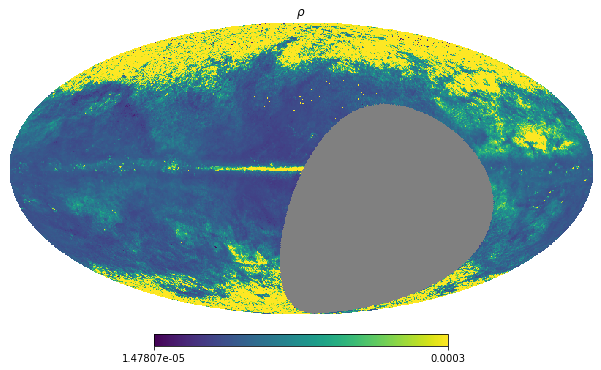

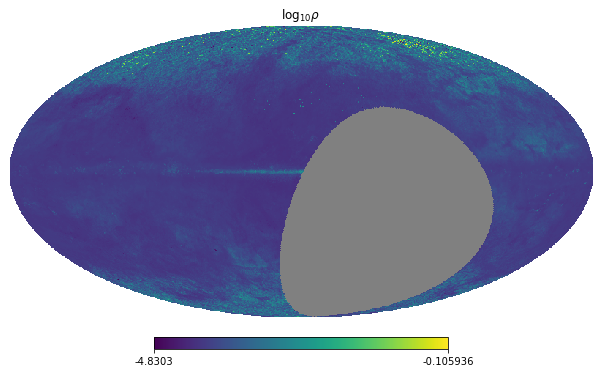

[0.00011176] [0.00073198] [7.86486535e-05]
[3.31085785e-05] [0.00062023]


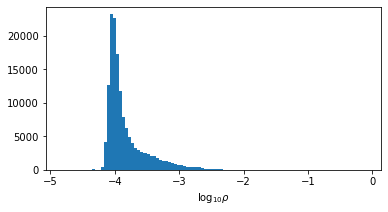

In [7]:


def plot_optimizer_sky_parameters(self,data_dict):
    dec = self.create_declination_mask(p)
    parameters = data_dict["final_parameters_array"]
    super_pixels_index_array = data_dict["super_pixels_index_array"]
    offsets,rhos,betas,Ts = self.separate_sky_optimizer_parameters(parameters)

    ## case for rho only varying in each superpixel, or fixed across the sky
    
    self.plot_healpix_mollview(rhos,super_pixels_index_array,self.nr_of_super_pixels,\
                              title=r"$\rho$",max=3E-4,declination_mask=True)
    rhos_masked = copy.deepcopy(rhos)
    rhos_masked[dec<-30]=hp.UNSEEN
    rhos_selected = rhos_masked[dec>=-30]
    self.plot_healpix_mollview(np.log10(rhos),super_pixels_index_array,self.nr_of_super_pixels,\
                              title=r"$\log_{10}\rho$",declination_mask=True)
    plt.savefig(self.optimizer_plots_folder+"/rho_log_10.pdf",dpi=400)
    plt.savefig(self.optimizer_plots_folder+"/rho_log_10.jpg")

    plt.show()
    
#     rho_masked = hp.ma(rhos)
#     rho_masked.mask = dec<-30
#     self.plot_healpix_mollview(rho_masked.filled(),super_pixels_index_array,self.nr_of_super_pixels,\
#                               title=r"$\rho$",max=2E-4)
#     print(np.sum(rhos<0))
#     plt.hist(rhos)
#     plt.hist(np.log(rhos))
    fig, ax = plt.subplots(figsize=(6,3))
    ax.hist(np.log10(rhos_selected),bins=100)
    ax.set_xlabel(r"$\log_{10}\rho$")
    
    plt.savefig(self.optimizer_plots_folder+"/rho_log_10_dist.jpg")

    import pandas as pd
    df = pd.DataFrame(rhos)
    quantile_50=df.quantile(.50).values
    quantile_84=df.quantile(.84135).values ## to get the upper 34.135% thresholds
    quantile_16=df.quantile(.15865).values ## to get the lower 34.135% thresholds
    print(quantile_50, quantile_84, quantile_16)
    upperlim=quantile_84-quantile_50
    lowerlim=quantile_50-quantile_16
    print(lowerlim, upperlim)
   # plt.hist(rhos_selected,bins=100)

plot_optimizer_sky_parameters(p, data_dict)

In [ ]:
p.optimizer_plots_folder

In [ ]:
#### masking declination over under 30

p.full_maps_nside

In [ ]:
p.super_pixel_nside

In [ ]:
p.nest

In [ ]:

np.pi

In [ ]:
create_mask(p)

In [ ]:
hp.nside2npix(128)
